**Purpose of the notebook: Analyze and visualise spreads between crude oil and retail fuel prices for each fuel.**

In [1]:
import os
os.chdir("C:/Users/zetru/OneDrive/Mémoire python/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.grid'] = True
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df=pd.read_hdf('df_v5.h5','df_v5')
df

,cp,id,nom_carburant,id_carburant,maj,valeur,litre_brut,type,latitude,longitude,ville,stations_rayon_5km,competition_geo
0,01,1000001,Gazole,1,2022-01-03,0.702500,0.435626,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
1,01,1000001,Gazole,1,2022-01-05,0.692500,0.447949,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
2,01,1000001,Gazole,1,2022-01-10,0.728333,0.452874,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
3,01,1000001,Gazole,1,2022-01-17,0.739167,0.484043,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
4,01,1000001,Gazole,1,2022-01-21,0.769167,0.497616,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537444,95,95870010,SP98,6,2022-12-23,0.856233,0.488413,R,48.936,2.206,Bezons,15,4
4537445,95,95870010,SP98,6,2022-12-27,0.874567,0.487324,R,48.936,2.206,Bezons,15,4
4537446,95,95870010,SP98,6,2022-12-28,0.874567,0.484175,R,48.936,2.206,Bezons,15,4
4537447,95,95870010,SP98,6,2022-12-29,0.879567,0.477600,R,48.936,2.206,Bezons,15,4


In [3]:
df['nom_carburant'] = df['nom_carburant'].replace({'E10': 'SP95-E10'})

In [4]:
df_filtre=(pd.DataFrame(df.groupby(['nom_carburant','maj'])['valeur'].mean())).reset_index()
df_filtre

,nom_carburant,maj,valeur
0,E85,2022-01-01,0.507524
1,E85,2022-01-02,0.509262
2,E85,2022-01-03,0.500251
3,E85,2022-01-04,0.507993
4,E85,2022-01-05,0.510227
...,...,...,...
2185,SP98,2022-12-27,0.839136
2186,SP98,2022-12-28,0.835993
2187,SP98,2022-12-29,0.852364
2188,SP98,2022-12-30,0.859754


In [5]:
df_brent=(pd.DataFrame(df.groupby(['maj'])['litre_brut'].mean())).reset_index()
df_brent

,maj,litre_brut
0,2022-01-01,0.427234
1,2022-01-02,0.427234
2,2022-01-03,0.435626
3,2022-01-04,0.442323
4,2022-01-05,0.447949
...,...,...
360,2022-12-27,0.487324
361,2022-12-28,0.484175
362,2022-12-29,0.477600
363,2022-12-30,0.486593


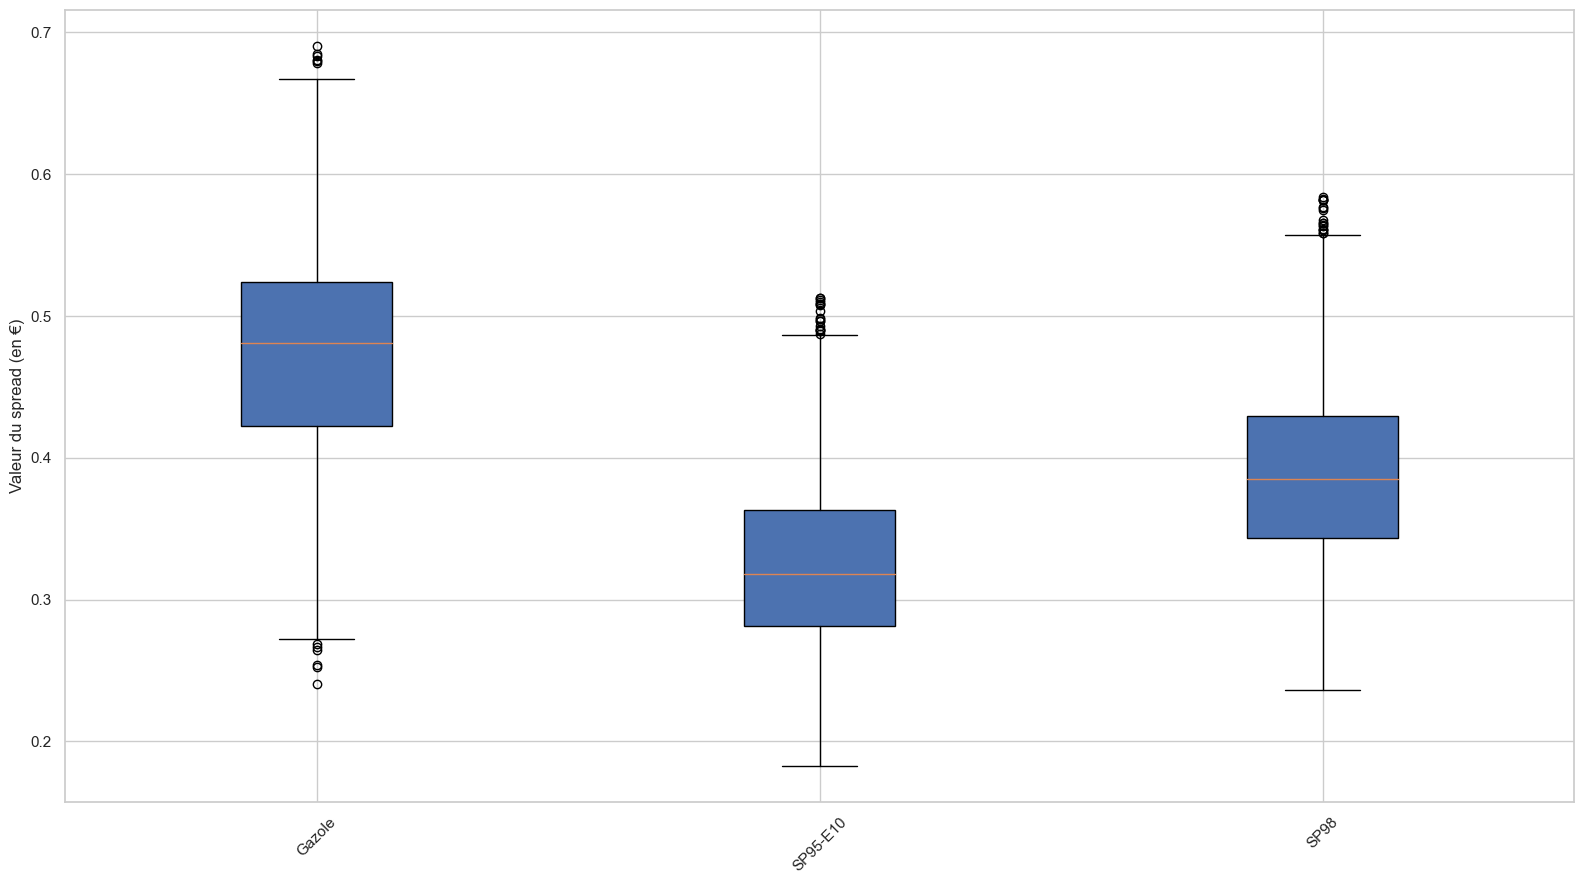

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtre and df_brent are already defined

# Removing specific fuel types
df_filtre = df_filtre[~df_filtre['nom_carburant'].isin(['E85', 'GPLc', 'SP95'])]

# Prepare data for boxplots
spreads_data = []
labels = []

for nom in df_filtre['nom_carburant'].unique():
    df_mask = df_filtre[df_filtre['nom_carburant'] == nom]
    spread = df_mask['valeur'].reset_index(drop=True) - df_brent['litre_brut']
    spreads_data.append(spread.tolist())  # Convert to list for boxplot compatibility
    labels.append(f'{nom}')

# Plotting all boxplots on the same graph
plt.figure(figsize=(16, 9))
plt.boxplot(spreads_data, labels=labels, patch_artist=True)
plt.ylabel('Valeur du spread (en €)')
plt.xticks(rotation=45)  # Rotate labels if they are long
plt.tight_layout()
plt.savefig('graph/Spread_carburants.pdf')
plt.show()

In [7]:
df_filtre_ar=(pd.DataFrame(df.groupby(['nom_carburant','maj','type'])['valeur'].mean())).reset_index()

In [8]:
df_filtre_ar['nom_carburant'].unique()

array(['E85', 'GPLc', 'Gazole', 'SP95', 'SP95-E10', 'SP98'], dtype=object)

In [14]:
df_filtre_ar=df_filtre_ar[~(df_filtre_ar['nom_carburant'].isin(['GPLc','E85', 'SP95']))]

In [15]:
df_filtre_ar['nom_carburant'].unique()

array(['Gazole', 'SP95-E10', 'SP98'], dtype=object)

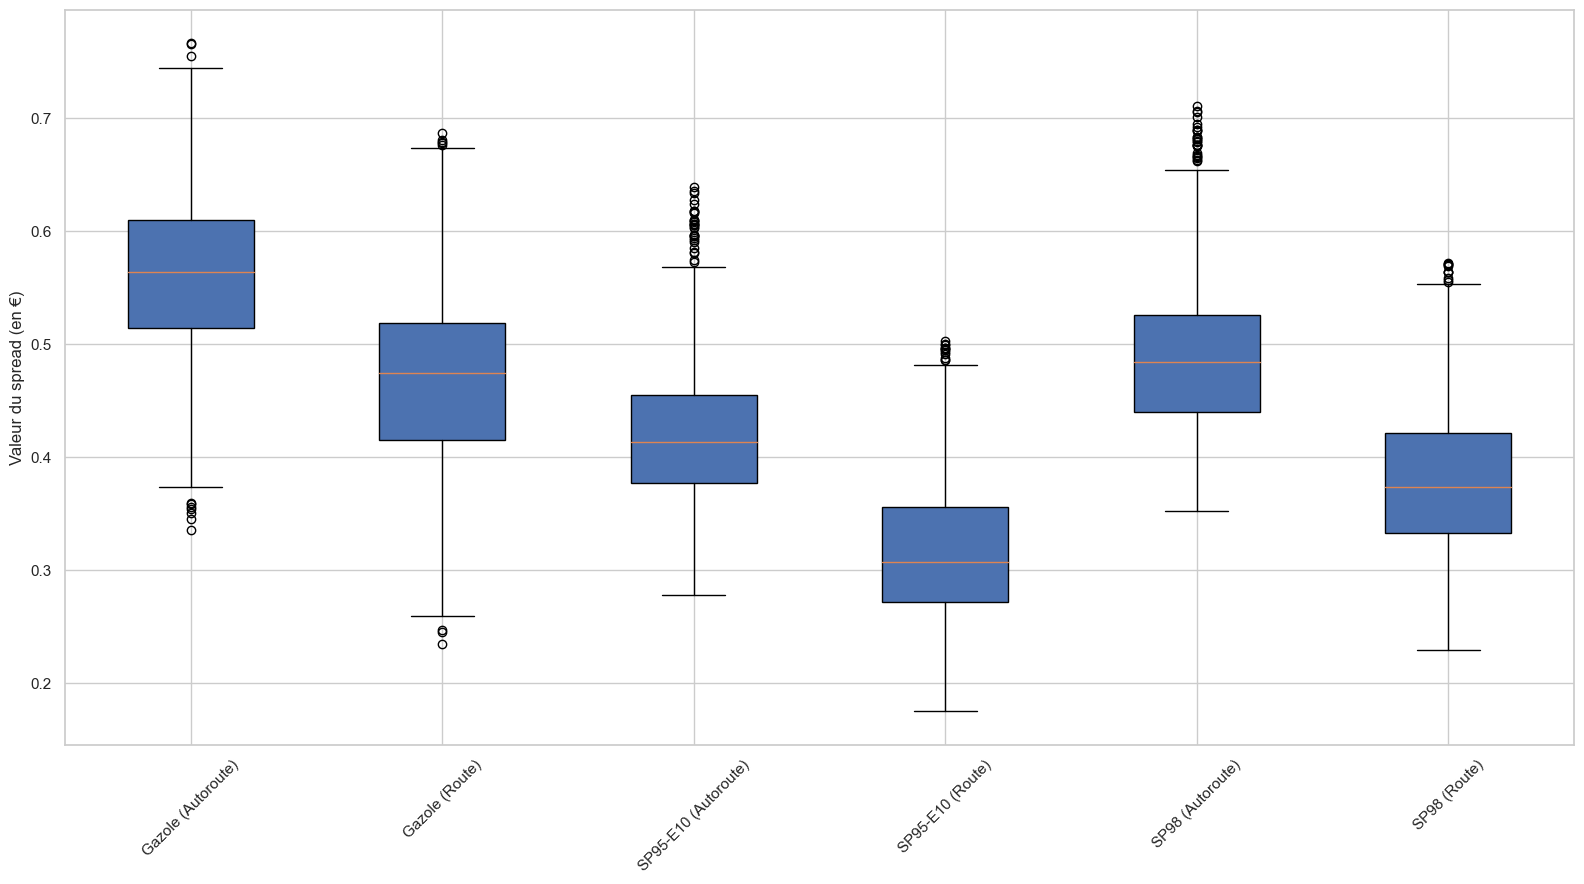

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


# Initialiser une liste pour stocker les données de spread et les étiquettes
spreads_data = []
labels = []

# Obtenir la liste unique des noms de carburant
noms_carburant = df_filtre_ar['nom_carburant'].unique()

# Pour chaque nom de carburant, traiter les deux types de stations et les organiser côte à côte
for nom in noms_carburant:
    for type_station in ['A', 'R']:  # Assumer que les types de stations sont bien 'autoroute' et 'route'
        df_mask = df_filtre_ar[(df_filtre_ar['nom_carburant'] == nom) & (df_filtre_ar['type'] == type_station)]
        spread = df_mask['valeur'].reset_index(drop=True) - df_brent['litre_brut']
        spreads_data.append(spread.tolist())  # Ajouter les données de spread
        if type_station=='A':
            labels.append(f'{nom} (Autoroute)')  # Ajouter l'étiquette correspondante
        if type_station=='R':
            labels.append(f'{nom} (Route)')  # Ajouter l'étiquette correspondante

# Configuration du graphique pour afficher les boxplots côte à côte par type de carburant
plt.figure(figsize=(16, 9))
plt.boxplot(spreads_data, labels=labels, patch_artist=True)
plt.ylabel('Valeur du spread (en €)')
plt.xticks(rotation=45)  # Rotation des étiquettes pour améliorer la lisibilité
plt.tight_layout()  # Ajuster automatiquement le sous-graphique pour qu'il s'insère dans la zone du graphique
plt.savefig('graph/Spread_carburants_par_type_station_cote_a_cote.pdf')
plt.show()


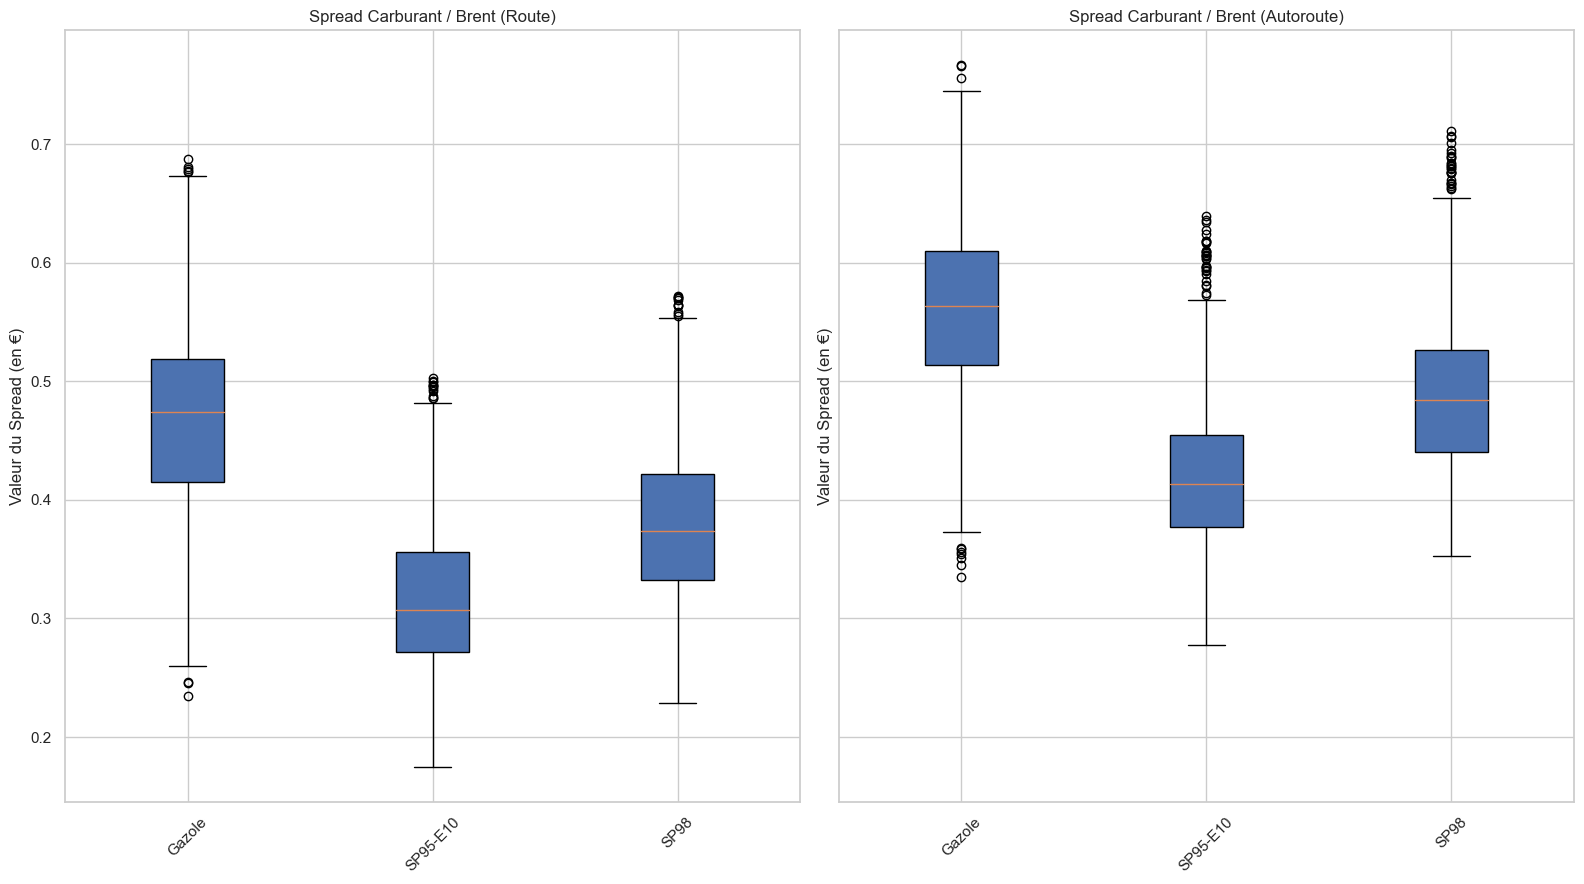

In [19]:
spreads_data_A = []
spreads_data_R = []

labels_A = []  # Étiquettes pour les stations sur autoroute
labels_R = []  # Étiquettes pour les stations sur route

# Obtenir la liste unique des noms de carburant
noms_carburant = df_filtre_ar['nom_carburant'].unique()

# Organiser les données par type de station
for nom in noms_carburant:
    for type_station in ['A', 'R']:
        df_mask = df_filtre_ar[(df_filtre_ar['nom_carburant'] == nom) & (df_filtre_ar['type'] == type_station)]
        spread = df_mask['valeur'].reset_index(drop=True) - df_brent['litre_brut']
        if type_station == 'A':
            spreads_data_A.append(spread.tolist())  # Ajouter les données de spread pour autoroute
            labels_A.append(nom)  # Ajouter l'étiquette correspondante pour autoroute
        elif type_station == 'R':
            spreads_data_R.append(spread.tolist())  # Ajouter les données de spread pour route
            labels_R.append(nom)  # Ajouter l'étiquette correspondante pour route

# Création de la figure et des subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharey=True)  # Deux lignes, une colonne

# Graphique pour les stations d'autoroute
axs[0].boxplot(spreads_data_R, labels=labels_R, patch_artist=True)
axs[0].set_title('Spread Carburant / Brent (Route)')
axs[0].set_ylabel('Valeur du Spread (en €)')
axs[0].tick_params(axis='x', rotation=45)

# Graphique pour les stations de route
axs[1].boxplot(spreads_data_A, labels=labels_A, patch_artist=True)
axs[1].set_title('Spread Carburant / Brent (Autoroute)')
axs[1].set_ylabel('Valeur du Spread (en €)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Ajuster l'espacement
plt.savefig('graph/Spread_carburants_par_type_station.pdf')
plt.show()